In [2]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [3]:
class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #init layers
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #set learning rate
        self.lr = learningrate
        
        #weights between layers
        #like this:
        # w11 w21
        # w21 w22
        # ...
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), 
                                        (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), 
                                        (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * 
                    final_outputs * (1.0 - final_outputs)), hidden_outputs.T)
        self.wih += self.lr * numpy.dot((hidden_errors * 
                    hidden_outputs * (1.0 - hidden_outputs)), inputs.T)
        
        pass
    
    def query(self, inputs_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [25]:
data_file = open("/mnt/e/storage_data/documents/code/machine_learning/mnist_train.csv", 'r')
data_list = data_file.readlines()
data_file.close()
for record in data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

test_file = open("/mnt/e/storage_data/documents/code/machine_learning/mnist_test.csv", "r")
test_list = test_file.readlines()
test_file.close()

This is a 7


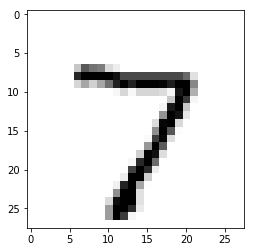

In [37]:
all_values = test_list[0].split(',')
matplotlib.pyplot.imshow(numpy.asfarray(all_values[1:]).reshape((28,28)), cmap='Greys', interpolation='None')
print('This is a', all_values[0])

In [38]:
guess = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
print('This is a', numpy.argmax(guess))

This is a 7


In [39]:
scorecard = []

for record in test_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [40]:
scorecard_array = numpy.asarray(scorecard)
print('Performance:', scorecard_array.sum() / scorecard_array.size * 100, '%')

Performance: 95.24 %
